In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
last_words = pd.read_excel("TX_LW_OG.xlsx")

#545 rows by 23 columns
last_words.head()

,Execution,Link,Link.1,Last Name,First Name,TDCJ Number,Age,Date,Race,County,...,"Previous Crime (0=No, 1=Yes)",Co-defendants,Number of victim,White victim,Hispanic victim,Black victim,Victim of other races,Female victim,Male victim,Last Statement
0,545,Offender Information,Last Statement,Cardenas,Ruben,999275,47,2017-11-08,Hispanic,Hidalgo,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"This is my statement: My final words. First,..."
1,544,Offender Information,Last Statement,Pruett,Robert,999411,38,2017-10-12,White,Bee,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,I just want to let everyone in here to know I ...
2,543,Offender Information,Last Statement,Preyor,Taichin,999494,46,2017-07-27,Black,Bexar,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h..."
3,542,Offender Information,Last Statement,Bigby,James,997,61,2017-03-14,White,Tarrant,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi..."
4,541,Offender Information,Last Statement,Ruiz,Rolando,999145,44,2017-03-07,Hispanic,Bexar,...,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"Yes sir, I would first like to say to the Sanc..."


In [4]:
last_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Execution                                          545 non-null    int64         
 1   Link                                               545 non-null    object        
 2   Link.1                                             545 non-null    object        
 3   Last Name                                          545 non-null    object        
 4   First Name                                         545 non-null    object        
 5   TDCJ Number                                        545 non-null    int64         
 6   Age                                                545 non-null    int64         
 7   Date                                               545 non-null    datetime64[ns]
 8   Race                

In [6]:
lw = last_words.drop(['Link', 'Link.1', 'TDCJ Number', 'White victim', 'Hispanic victim', 
                      'Black victim', 'Victim of other races', 'Female victim', 'Male victim'], axis = 1)
lw.head()

,Execution,Last Name,First Name,Age,Date,Race,County,Age (when received),Education level (Highest Grade Completed),"Native County (0=In state, 1 = From out of state)","Previous Crime (0=No, 1=Yes)",Co-defendants,Number of victim,Last Statement
0,545,Cardenas,Ruben,47,2017-11-08,Hispanic,Hidalgo,28.0,11.0,1.0,0.0,0.0,1.0,"This is my statement: My final words. First,..."
1,544,Pruett,Robert,38,2017-10-12,White,Bee,22.0,8.0,0.0,1.0,0.0,1.0,I just want to let everyone in here to know I ...
2,543,Preyor,Taichin,46,2017-07-27,Black,Bexar,34.0,10.0,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h..."
3,542,Bigby,James,61,2017-03-14,White,Tarrant,36.0,9.0,0.0,1.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi..."
4,541,Ruiz,Rolando,44,2017-03-07,Hispanic,Bexar,22.0,10.0,0.0,1.0,4.0,1.0,"Yes sir, I would first like to say to the Sanc..."


In [7]:


lw['Co-defendants'] = lw['Co-defendants'].fillna(0)
lw['Number of victim'] = lw['Number of victim'].fillna(1)
lw = lw.rename(columns = {'Education level  (Highest Grade Completed)':'Education'})
lw.head(15)

,Execution,Last Name,First Name,Age,Date,Race,County,Age (when received),Education,"Native County (0=In state, 1 = From out of state)","Previous Crime (0=No, 1=Yes)",Co-defendants,Number of victim,Last Statement
0,545,Cardenas,Ruben,47,2017-11-08,Hispanic,Hidalgo,28.0,11.0,1.0,0.0,0.0,1.0,"This is my statement: My final words. First,..."
1,544,Pruett,Robert,38,2017-10-12,White,Bee,22.0,8.0,0.0,1.0,0.0,1.0,I just want to let everyone in here to know I ...
2,543,Preyor,Taichin,46,2017-07-27,Black,Bexar,34.0,10.0,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h..."
3,542,Bigby,James,61,2017-03-14,White,Tarrant,36.0,9.0,0.0,1.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi..."
4,541,Ruiz,Rolando,44,2017-03-07,Hispanic,Bexar,22.0,10.0,0.0,1.0,4.0,1.0,"Yes sir, I would first like to say to the Sanc..."
5,540,Edwards,Terry,43,2017-01-26,Black,Dallas,30.0,12.0,0.0,1.0,1.0,1.0,"Yes, I made peace with God. I hope y'all make ..."
6,539,Wilkins,Christopher,48,2017-01-11,White,Tarrant,37.0,12.0,0.0,0.0,0.0,2.0,None
7,538,Fuller,Barney,58,2016-10-05,White,Houston,45.0,9.0,1.0,0.0,0.0,1.0,"I don't have anything to say, you can proceed ..."
8,537,Vasquez,Pablo,38,2016-04-06,Hispanic,Hidalgo,21.0,8.0,0.0,0.0,1.0,1.0,"I just want to tell my family thank you, my mo..."
9,536,Ward,Adam,33,2016-03-22,White,Hunt,24.0,NaN,0.0,0.0,0.0,1.0,I would like to thank everyone that has showed...


In [8]:
#fill in Nulls with average education
mean_edu = lw['Education'].mean()
lw['Education'].fillna(value = mean_edu, inplace = True)

#fill previous crime with a .5
lw['Previous Crime (0=No, 1=Yes)'] = lw['Previous Crime (0=No, 1=Yes)'].fillna(0.5)

#create word count column
lw['Word Count'] = lw['Last Statement'].apply(lambda n: len(n.split()))

In [13]:
lw.head(15)

,Execution,Last Name,First Name,Age,Date,Race,County,Age (when received),Education,"Native County (0=In state, 1 = From out of state)","Previous Crime (0=No, 1=Yes)",Co-defendants,Number of victim,Last Statement,Word Count
0,545,Cardenas,Ruben,47,2017-11-08,Hispanic,Hidalgo,28.0,11.000,1.0,0.0,0.0,1.0,"This is my statement: My final words. First,...",140
1,544,Pruett,Robert,38,2017-10-12,White,Bee,22.0,8.000,0.0,1.0,0.0,1.0,I just want to let everyone in here to know I ...,84
2,543,Preyor,Taichin,46,2017-07-27,Black,Bexar,34.0,10.000,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h...",35
3,542,Bigby,James,61,2017-03-14,White,Tarrant,36.0,9.000,0.0,1.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi...",158
4,541,Ruiz,Rolando,44,2017-03-07,Hispanic,Bexar,22.0,10.000,0.0,1.0,4.0,1.0,"Yes sir, I would first like to say to the Sanc...",74
5,540,Edwards,Terry,43,2017-01-26,Black,Dallas,30.0,12.000,0.0,1.0,1.0,1.0,"Yes, I made peace with God. I hope y'all make ...",13
6,539,Wilkins,Christopher,48,2017-01-11,White,Tarrant,37.0,12.000,0.0,0.0,0.0,2.0,None,1
7,538,Fuller,Barney,58,2016-10-05,White,Houston,45.0,9.000,1.0,0.0,0.0,1.0,"I don't have anything to say, you can proceed ...",11
8,537,Vasquez,Pablo,38,2016-04-06,Hispanic,Hidalgo,21.0,8.000,0.0,0.0,1.0,1.0,"I just want to tell my family thank you, my mo...",48
9,536,Ward,Adam,33,2016-03-22,White,Hunt,24.0,10.148,0.0,0.0,0.0,1.0,I would like to thank everyone that has showed...,410


In [9]:
# LAST STATEMENT ANALYSIS
lw['Last Statement'] = lw['Last Statement'].str.lower()

lw['Innocent'] = lw['Last Statement'].str.contains('|'.join(['innocent', 'innocence', 'not guilty']))
print(lw.Innocent.value_counts())

False    508
True      37
Name: Innocent, dtype: int64


In [10]:
from collections import Counter
results = Counter()
lw['Last Statement'].str.lower().str.split().apply(results.update)
print(results)

Counter({'i': 3395, 'to': 1740, 'and': 1453, 'the': 1343, 'you': 1327, 'my': 937, 'for': 858, 'that': 778, 'love': 740, 'of': 710, 'all': 587, 'am': 521, 'a': 515, 'have': 509, 'is': 498, 'in': 491, 'me': 392, 'this': 337, 'your': 326, 'be': 324, 'not': 318, 'know': 314, 'will': 312, 'thank': 307, 'you.': 291, 'it': 289, 'want': 242, 'with': 241, 'would': 236, 'like': 233, 'me.': 223, 'what': 222, 'but': 213, 'on': 201, 'we': 187, 'are': 186, 'god': 173, 'was': 172, 'family': 171, 'hope': 164, 'just': 162, "i'm": 158, 'there': 156, 'sorry': 156, 'he': 153, 'forgive': 145, 'as': 143, 'they': 141, 'say': 141, 'can': 135, 'tell': 135, 'do': 132, "don't": 130, 'take': 129, 'going': 129, 'you,': 126, 'none': 123, 'no': 121, 'if': 119, 'see': 119, 'been': 117, 'so': 115, 'them': 113, 'did': 111, 'who': 108, 'one': 104, 'all.': 104, 'give': 102, 'people': 97, 'it.': 96, 'keep': 94, 'sorry.': 91, 'at': 91, 'family,': 90, 'has': 89, 'ask': 87, 'life': 86, 'here': 85, 'get': 85, 'lord': 84, 'out

In [17]:
lw['God'] = lw['Last Statement'].str.contains('|'.join(['god', 'lord', 'jesus', 'christ']))

lw['Mom'] = lw['Last Statement'].str.contains('|'.join(['mom', 'mother', 'mommy', 'ma']))

lw['Dad'] = lw['Last Statement'].str.contains('|'.join(['dad', 'daddy', 'father']))

lw['sorry'] = lw['Last Statement'].str.contains('|'.join(['sorry', 'apologize', 'forgive me', 'apologies']))

lw['love'] = lw['Last Statement'].str.contains('|'.join(['love', 'loving']))

lw['family'] = lw['Last Statement'].str.contains('|'.join(['family', 'families']))

lw['hate'] = lw['Last Statement'].str.contains('|'.join(['hate', 'hatred']))

lw['life'] = lw['Last Statement'].str.contains('|'.join(['life', 'living', 'lives', 'live']))

lw['death'] = lw['Last Statement'].str.contains('|'.join(['death', 'deaths', 'dying']))

lw.head(5)

,Execution,Last Name,First Name,Age,Date,Race,County,Age (when received),Education,"Native County (0=In state, 1 = From out of state)",...,Innocent,God,Mom,Dad,sorry,love,family,hate,life,death
0,545,Cardenas,Ruben,47,2017-11-08,Hispanic,Hidalgo,28.0,11.0,1.0,...,False,False,True,False,True,True,True,False,True,False
1,544,Pruett,Robert,38,2017-10-12,White,Bee,22.0,8.0,0.0,...,False,False,False,False,False,True,False,False,True,False
2,543,Preyor,Taichin,46,2017-07-27,Black,Bexar,34.0,10.0,0.0,...,False,False,False,False,False,True,False,False,True,False
3,542,Bigby,James,61,2017-03-14,White,Tarrant,36.0,9.0,0.0,...,False,True,True,False,True,True,True,True,False,True
4,541,Ruiz,Rolando,44,2017-03-07,Hispanic,Bexar,22.0,10.0,0.0,...,False,True,True,False,True,True,True,False,False,False


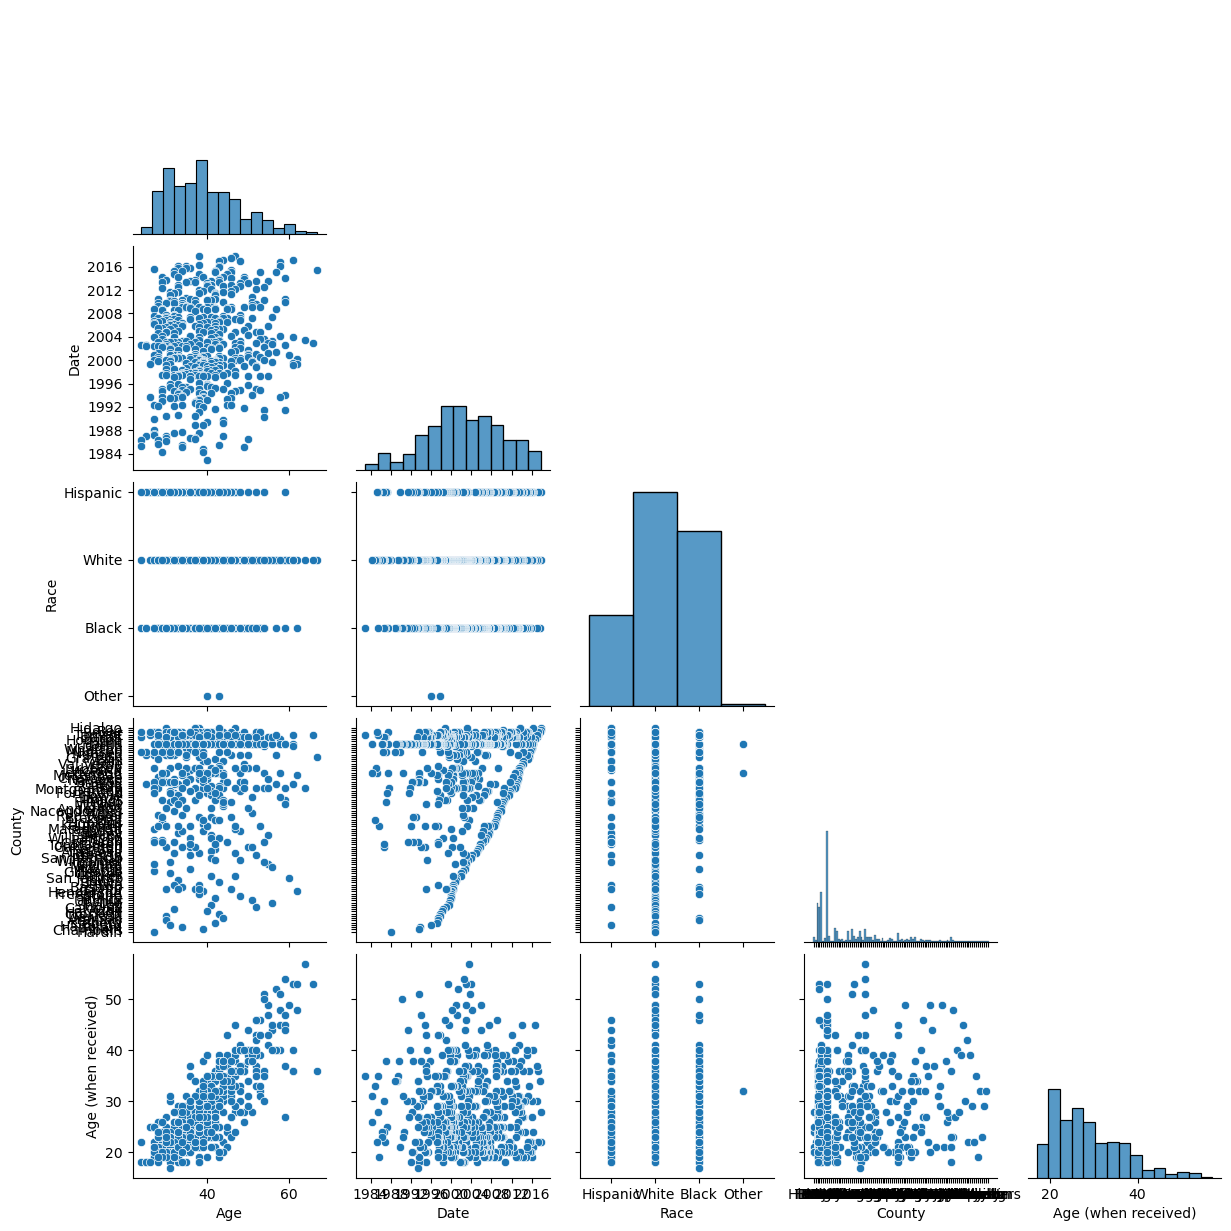

In [16]:
sns.pairplot(lw, vars = lw.columns[3:8], corner = True)
plt.show()

In [18]:
print(lw.love.value_counts())
lw.to_excel('CAPSTONE3.xlsx', sheet_name = 'page1')


True     309
False    236
Name: love, dtype: int64
